# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector :**  
Period =   
tdepth = **2
   
  - **Sector :**  
Period =  
tdepth = **2

In [6]:
ID = 470987100
sectors = np.array([20])

period = 4.1192418194
tdepth = 0.0388925079**2

lc = pd.read_csv("TOI_1732_20.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

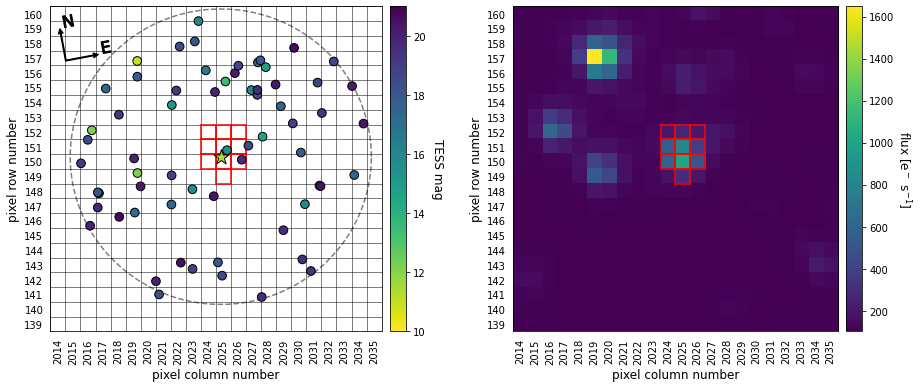

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,470987100,11.3266,10.130,9.458,9.255,111.801499,53.045087,0.613891,0.632571,3876.0,13.347400,0.000,0.000
1,470987101,15.6780,14.861,14.372,14.277,111.806043,53.047085,0.870000,0.677439,5135.0,0.986836,12.184,53.810
2,742761070,19.5419,NaN,NaN,NaN,111.814226,53.042674,NaN,NaN,NaN,0.481227,28.883,107.500
3,470987102,18.6348,16.706,15.837,15.919,111.819780,53.047389,0.470000,0.425494,3517.0,0.925601,40.422,78.159
4,742761069,20.4246,NaN,NaN,NaN,111.793183,53.031054,NaN,NaN,NaN,-1.390740,53.630,199.617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,742761089,18.6908,NaN,NaN,NaN,111.881429,53.072788,NaN,NaN,3711.0,0.880022,199.628,59.998
62,742761081,20.3890,NaN,NaN,NaN,111.893627,53.048124,NaN,NaN,NaN,0.735659,199.682,86.824
63,742820951,19.9516,NaN,NaN,NaN,111.713286,53.028038,NaN,NaN,NaN,NaN,200.577,252.217
64,470987086,18.3634,16.536,15.870,15.752,111.749313,52.998533,NaN,NaN,3157.0,2.234230,202.134,214.012


In [5]:
ap = np.array([[2025, 149], [2024, 150], [2025, 150], [2026, 150], 
               [2024, 151], [2025, 151], [2026, 151], [2024, 152], 
               [2025, 152], [2026, 152]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [7]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,470987100,11.3266,10.130,9.458,9.255,111.801499,53.045087,0.613891,0.632571,3876.0,13.347400,0.000,0.000,9.770845e-01,0.001548
1,470987101,15.6780,14.861,14.372,14.277,111.806043,53.047085,0.870000,0.677439,5135.0,0.986836,12.184,53.810,1.840914e-02,0.082167
2,742761070,19.5419,NaN,NaN,NaN,111.814226,53.042674,NaN,NaN,NaN,0.481227,28.883,107.500,3.155657e-04,0.000000
3,470987102,18.6348,16.706,15.837,15.919,111.819780,53.047389,0.470000,0.425494,3517.0,0.925601,40.422,78.159,5.323882e-04,0.000000
4,742761069,20.4246,NaN,NaN,NaN,111.793183,53.031054,NaN,NaN,NaN,-1.390740,53.630,199.617,1.273282e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,742761089,18.6908,NaN,NaN,NaN,111.881429,53.072788,NaN,NaN,3711.0,0.880022,199.628,59.998,3.185287e-26,0.000000
62,742761081,20.3890,NaN,NaN,NaN,111.893627,53.048124,NaN,NaN,NaN,0.735659,199.682,86.824,1.640161e-29,0.000000
63,742820951,19.9516,NaN,NaN,NaN,111.713286,53.028038,NaN,NaN,NaN,NaN,200.577,252.217,2.886619e-33,0.000000
64,470987086,18.3634,16.536,15.870,15.752,111.749313,52.998533,NaN,NaN,3157.0,2.234230,202.134,214.012,3.202100e-33,0.000000


In [8]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

470987101
470987784


# Ploting CC File

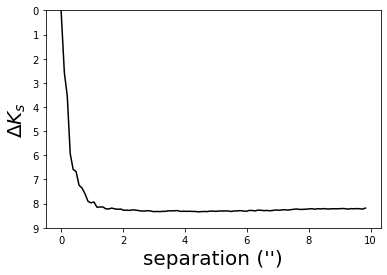

In [9]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [10]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 470987100.
Calculating EB and EBx2P scenario probabilities for 470987100.
Calculating PTP scenario probability for 470987100.
Calculating PEB and PEBx2P scenario probabilities for 470987100.
Calculating STP scenario probability for 470987100.
Calculating SEB and SEBx2P scenario probabilities for 470987100.
Calculating DTP scenario probability for 470987100.
Calculating DEB and DEBx2P scenario probabilities for 470987100.
Calculating BTP scenario probability for 470987100.
Calculating BEB and BEBx2P scenario probabilities for 470987100.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 470987101.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 470987784.
Wall time: 40min 53s


In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.01728897013446551
NFPP =  0.015396339456328846


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,470987100,TP,0.613891,0.632571,4.119242,86.258647,0.141077,0.866879,129.376816,2.407601,0.000000,0.000000,8.513792e-01
1,470987100,EB,0.613891,0.632571,4.119242,83.353152,1.882610,0.143872,39.927542,0.000000,0.581281,0.585880,5.434530e-13
2,470987100,EBx2P,0.613891,0.632571,8.238484,87.698295,0.745067,0.636542,186.744692,0.000000,0.588636,0.590504,4.139623e-05
3,470987100,PTP,0.613891,0.632571,4.119242,87.544723,0.273420,0.663877,155.706336,3.076965,0.000000,0.000000,2.214921e-02
4,470987100,PEB,0.613891,0.632571,4.119242,85.828901,1.168367,0.051387,288.416342,0.000000,0.105902,0.128320,3.118388e-13
5,470987100,PEBx2P,0.613891,0.632571,8.238484,87.479383,0.698181,0.771779,200.065892,0.000000,0.589531,0.591016,2.749646e-06
6,470987100,STP,0.604305,0.597670,4.119242,88.999268,0.263966,0.015643,130.632733,3.340841,0.000000,0.000000,1.718910e-04
7,470987100,SEB,0.120919,0.148086,4.119242,88.432876,0.095618,0.938576,159.854300,0.000000,0.029710,0.100000,7.037726e-06
8,470987100,SEBx2P,0.245657,0.270863,8.238484,88.792892,0.456872,0.735023,175.464509,0.000000,0.242909,0.268443,4.294730e-05
9,470987100,DTP,0.613891,0.632571,4.119242,87.153926,0.246247,0.684509,125.547524,2.571758,0.000000,0.000000,1.091826e-01


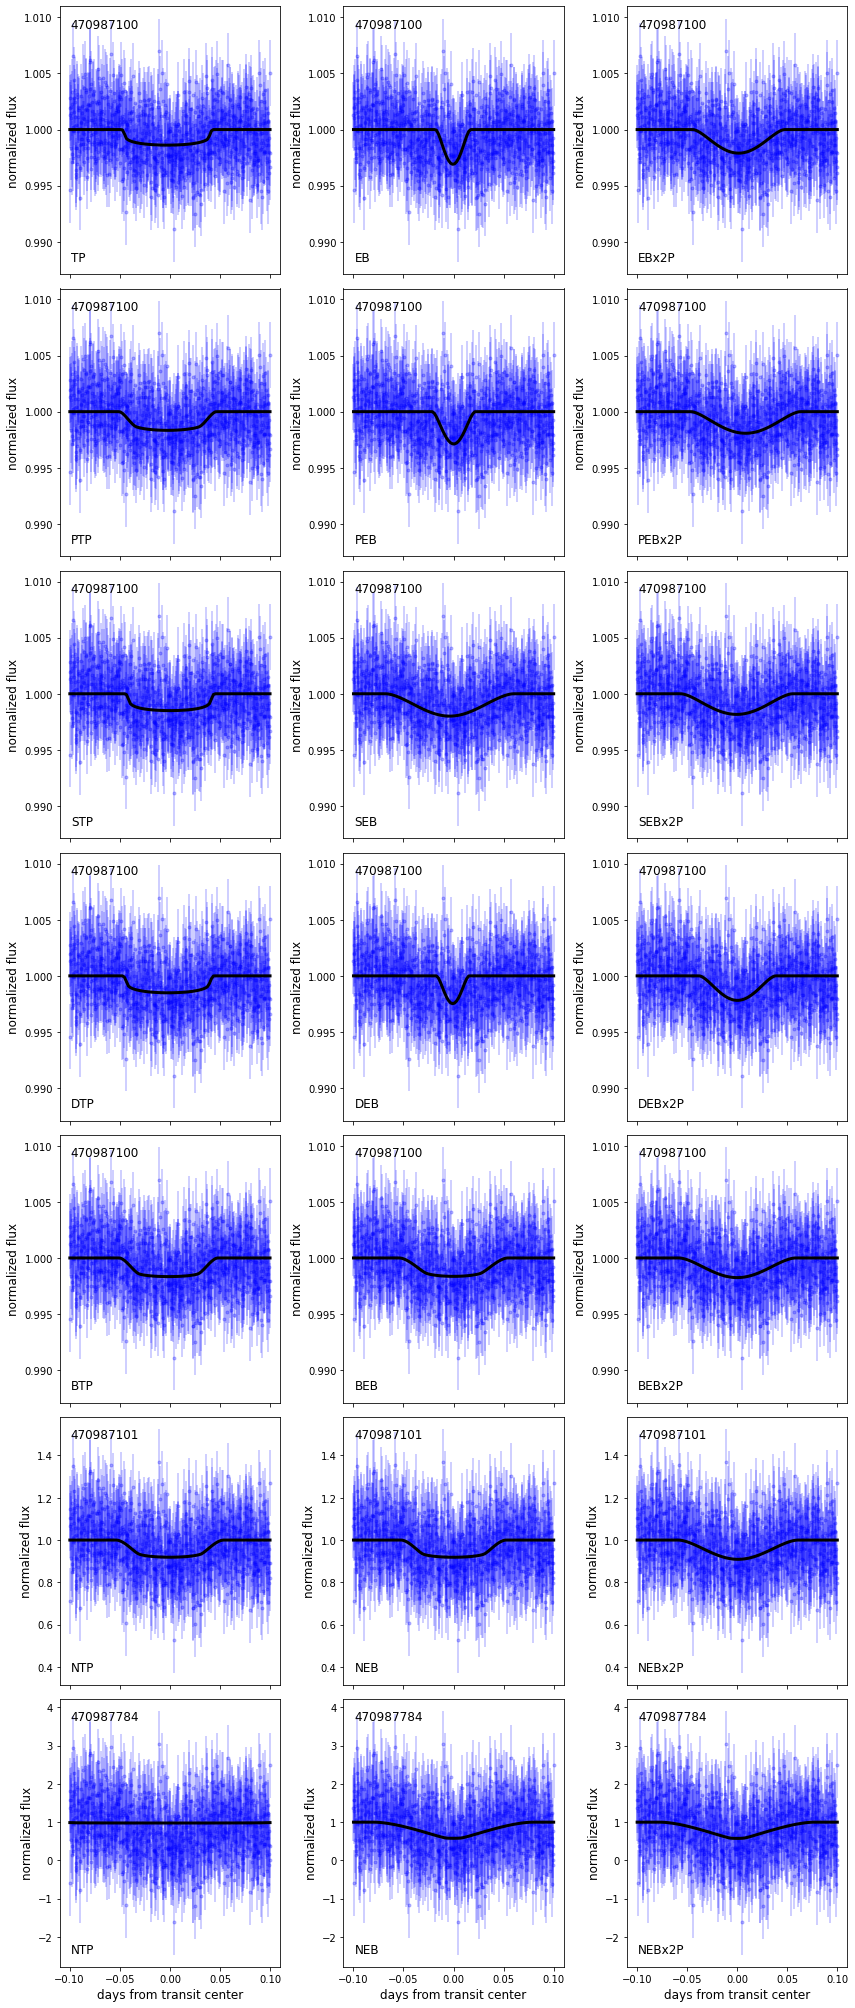

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))